In [1]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model="""
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(alpha + beta * x, sigma);
}
"""

In [3]:
datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]

In [4]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [5]:
fit = pystan.stan(model_code=model, data=dict(y=heights, x=weights, N=len(heights)))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e6f02cee022758e7332c64aa8df9a3e8 NOW.


In [6]:
fit

Inference for Stan model: anon_model_e6f02cee022758e7332c64aa8df9a3e8.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha -87.44    0.24   6.89 -101.7  -91.6 -87.28 -83.08 -73.97    853    1.0
beta    3.45  3.6e-3   0.11   3.24   3.38   3.45   3.51   3.67    857    1.0
sigma   1.71    0.01   0.39   1.16   1.44   1.64    1.9   2.67    858    1.0
lp__  -14.08    0.05   1.42  -17.9 -14.66  -13.7 -13.07 -12.52    778    1.0

Samples were drawn using NUTS at Mon Mar 20 16:42:29 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

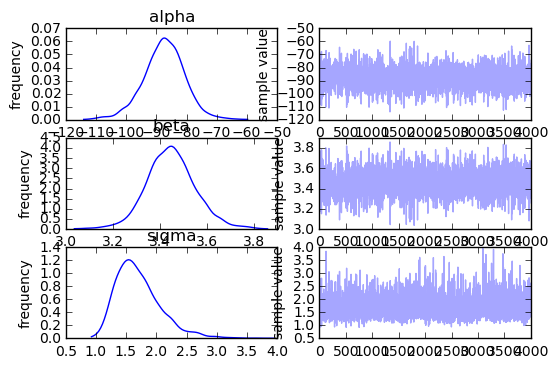

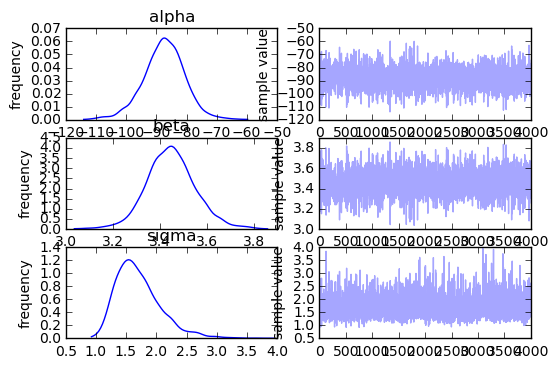

In [7]:
fit.plot()

In [12]:
samples = fit.extract(permuted=True)
alpha = np.mean(samples["alpha"])
beta = np.mean(samples["beta"])

In [13]:
samples

OrderedDict([('alpha',
              array([-82.22820262, -92.38969827, -83.37650134, ..., -90.50577089,
                     -81.99767927, -88.54256003])),
             ('beta',
              array([ 3.3617893 ,  3.5202511 ,  3.38053096, ...,  3.49791975,
                      3.36787773,  3.47229179])),
             ('sigma',
              array([ 1.88958229,  1.46308603,  1.4933092 , ...,  1.09260552,
                      1.5696753 ,  1.55110954])),
             ('lp__',
              array([-13.86421223, -13.0418492 , -13.16953399, ..., -14.2712301 ,
                     -12.93044326, -13.01552621]))])

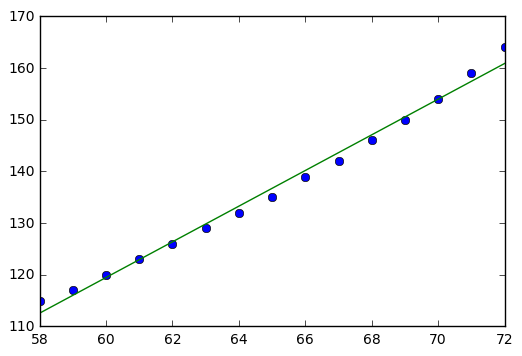

In [14]:
plt.plot(weights, heights, "o")
plt.plot(weights, alpha + beta * weights)
plt.show()